# Machine_Learning_Fraud_Detection

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Dataset Description
In this competition you are predicting the probability that an online transaction is fraudulent, as denoted by the binary target `isFraud`.

The data is broken into two files identity and transaction, which are joined by `TransactionID`. Not all transactions have corresponding identity information.

Categorical Features - Transaction
- `ProductCD`
- `card1` - `card6`
- `addr1`, `addr2`
- `P_emaildomain`
- `R_emaildomain`
- `M1` - `M9`

Categorical Features - Identity
- `DeviceType`
- `DeviceInfo`
- `id_12` - `id_38`

The `TransactionDT` feature is a timedelta from a given reference datetime (not an actual timestamp).

You can read more about the data from this post by the competition host.



In [ ]:
# Data can be found here=> https://kaggle.com/competitions/ieee-fraud-detection

# train_identity = pd.read_csv('train_identity.csv')
# train_transaction = pd.read_csv('train_transaction.csv')
# test_identity = pd.read_csv('test_identity.csv')
# test_transaction = pd.read_csv('test_transaction.csv')

# Exploratory Data Analysis (EDA)

In [ ]:
# print sample of train_identity
train_identity.head()

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,...,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,...,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS


In [ ]:
# print sample of train_transaction
train_transaction.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Combine the data and work with the whole dataset
train = pd.merge(train_transaction, train_identity, on='TransactionID', how='left')
test = pd.merge(test_transaction, test_identity, on='TransactionID', how='left')

In [ ]:
# Delete the variables for resources optimization
del train_identity, train_transaction, test_identity, test_transaction

id_01 - id_11 are continuous variables, id_12 - id_38 are categorical

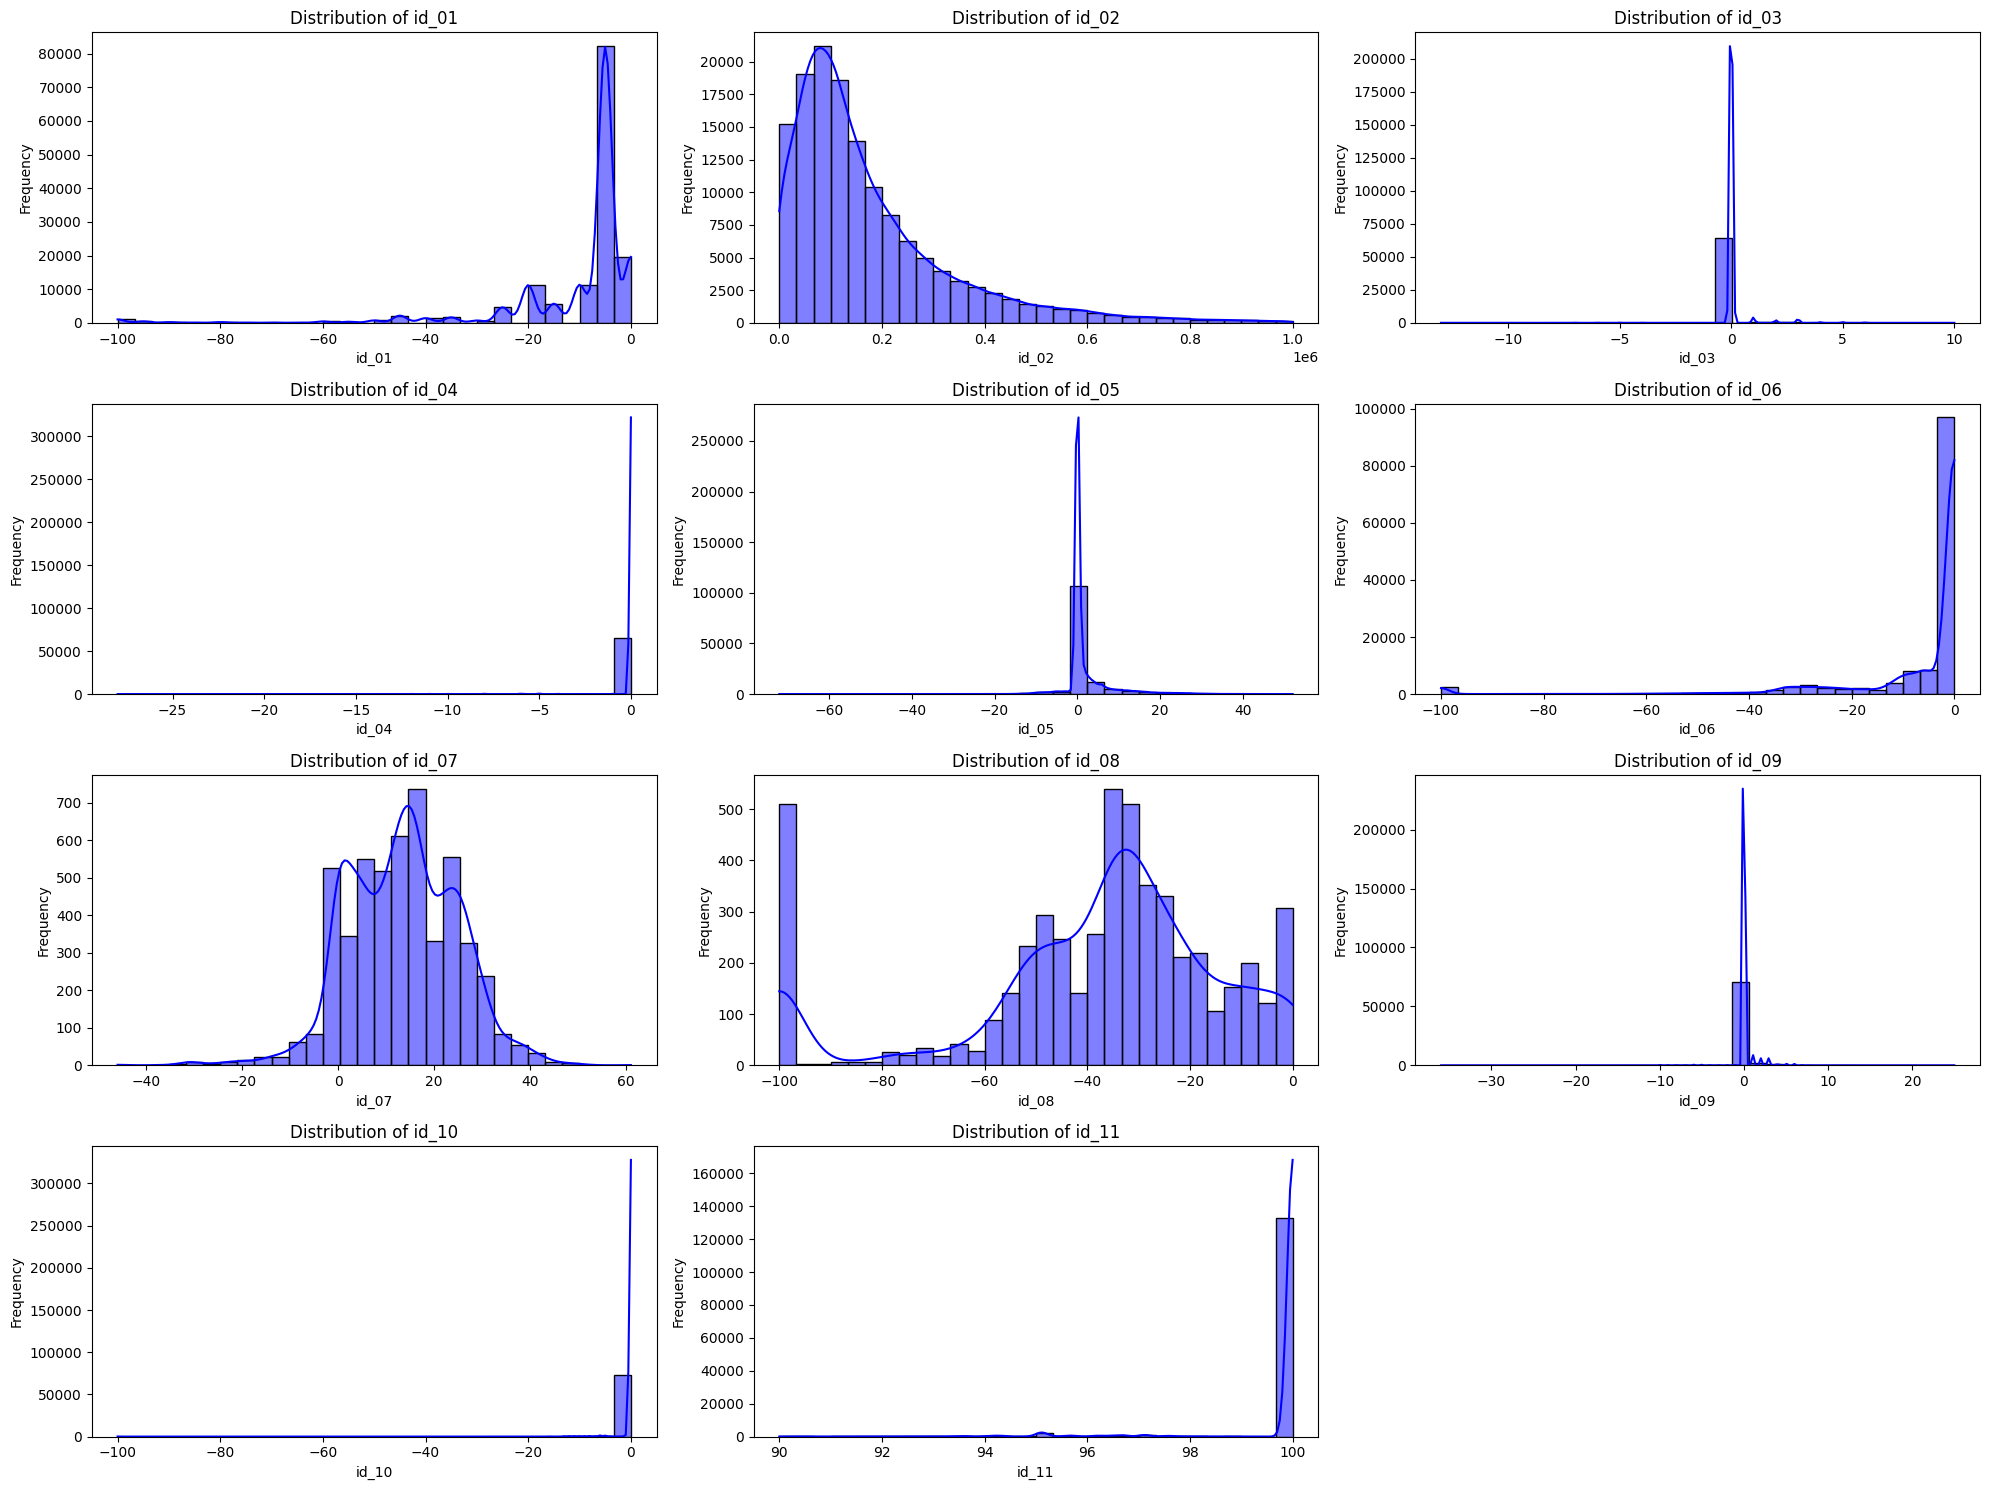

In [ ]:
# Set up the matplotlib figure
plt.figure(figsize=(20, 15))  # Adjust the size based on the number of columns

# Define the columns of interest
columns = ['id_01', 'id_02', 'id_03', 'id_04', 'id_05',
           'id_06', 'id_07', 'id_08', 'id_09', 'id_10', 'id_11']

# Create subplots for each column
for i, col in enumerate(columns, 1):
    plt.subplot(4, 3, i)  # Arrange plots in a grid (e.g., 4 rows x 3 columns)
    sns.histplot(train[col], kde=True, bins=30, color='blue')  # Histogram with KDE
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

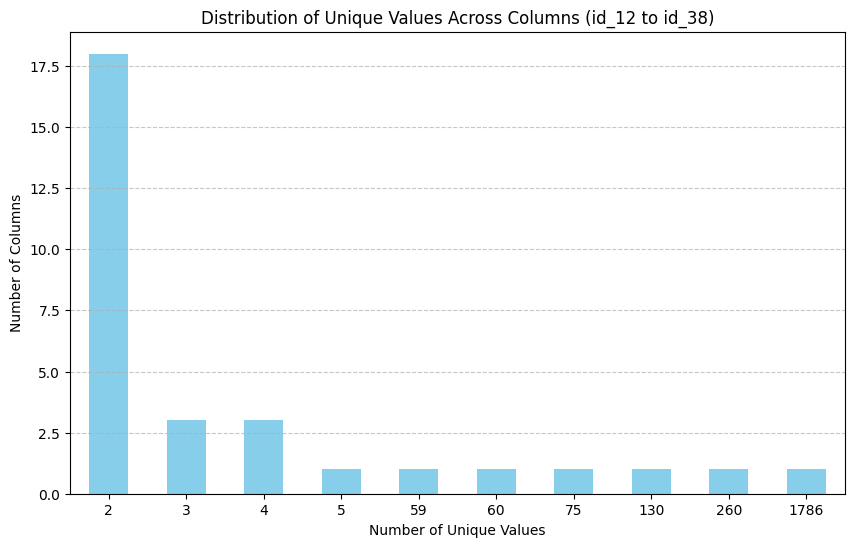

In [ ]:
# Plot the distribution of the unique values in columns 'id_12' to 'id_38'
import pandas as pd

# Create categorical columns based on if the value is a number or a string
categorical_columns = [col for col in train.columns if train[col].dtype == 'object']


# Calculate the number of unique values for each column
unique_value_counts = [train[col].nunique() for col in categorical_columns]

# Count the frequency of each unique value count
unique_value_freq = pd.Series(unique_value_counts).value_counts().sort_index()

# Bar plot
plt.figure(figsize=(10, 6))
unique_value_freq.plot(kind='bar', color='skyblue')
plt.title('Distribution of Unique Values Across Columns (id_12 to id_38)')
plt.xlabel('Number of Unique Values')
plt.ylabel('Number of Columns')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


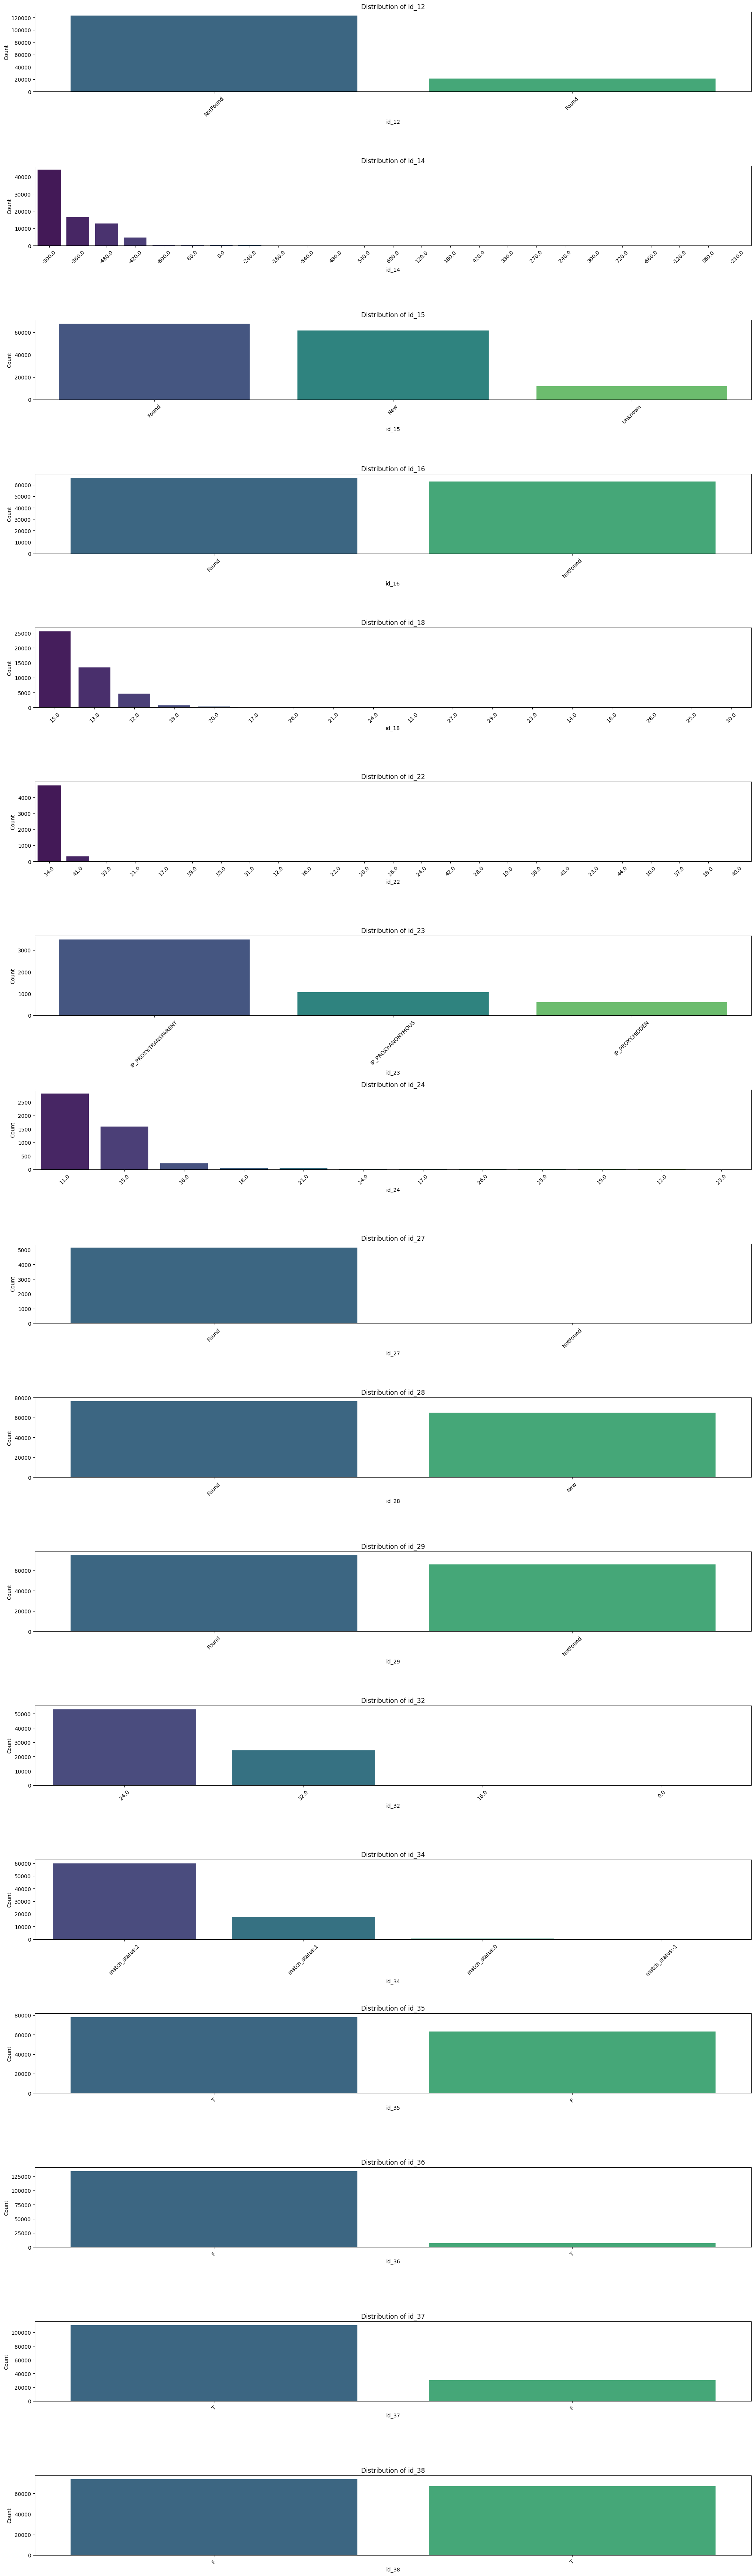

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the categorical columns of interest
categorical_columns = [f'id_{i}' for i in range(12, 39)]  # id_12 to id_38

# Filter columns with less than 25 unique values
filtered_columns = [col for col in categorical_columns if train[col].nunique() <= 25]

# Set up the matplotlib figure
plt.figure(figsize=(20, 4 * len(filtered_columns)))  # Adjust size dynamically based on filtered columns

# Create subplots for each column with <20 unique values
for i, col in enumerate(filtered_columns, 1):
    plt.subplot(len(filtered_columns), 1, i)  # Arrange plots vertically
    sns.countplot(data=train, x=col, order=train[col].value_counts().index, palette='viridis')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

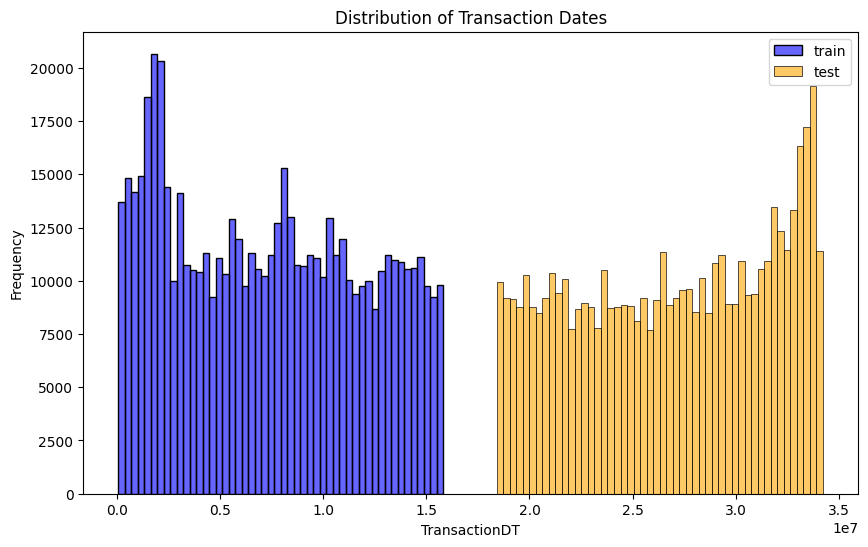

In [ ]:
# Plotting the distribution of 'TransactionDT' for train and test datasets
plt.figure(figsize=(10, 6))
sns.histplot(train['TransactionDT'], label='train', color='blue', kde=False, bins=50, alpha=0.6)
sns.histplot(test['TransactionDT'], label='test', color='orange', kde=False, bins=50, alpha=0.6)

# Add legend, title, and labels
plt.legend()
plt.title('Distribution of Transaction Dates')
plt.xlabel('TransactionDT')
plt.ylabel('Frequency')

# Show the plot
plt.show()

Since training and testing transactions do not seem to overlap, it would be wise to use time-based split for validation.

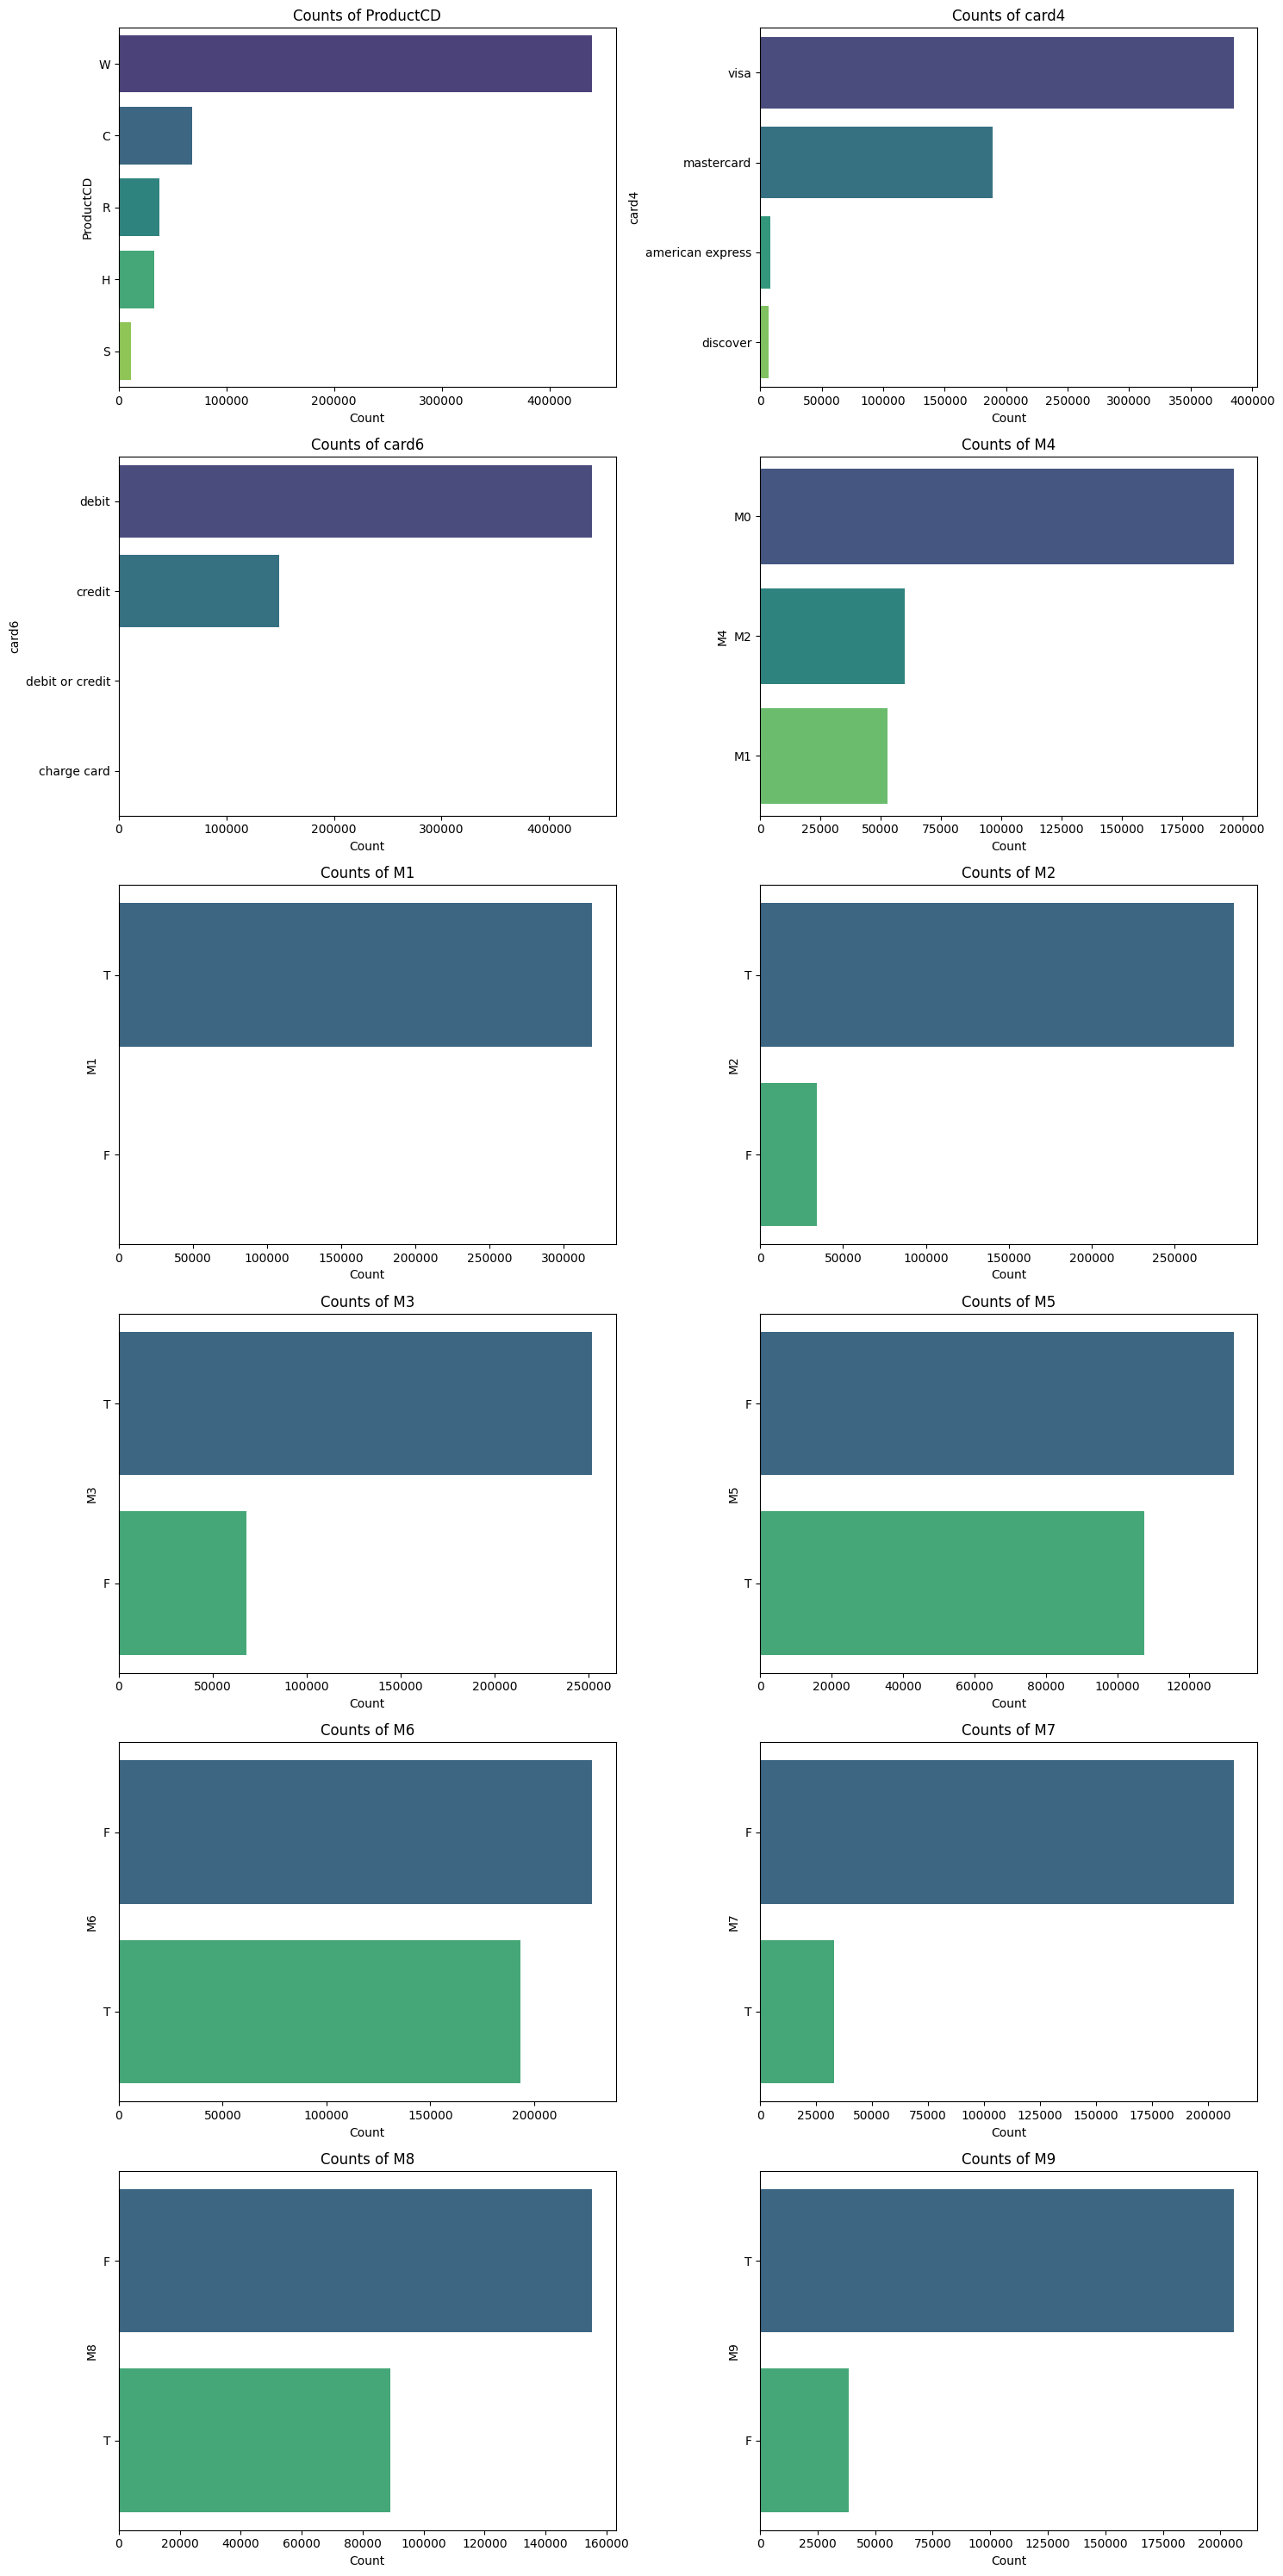

In [ ]:
# List of categorical features to plot
features = ['ProductCD', 'card4', 'card6', 'M4', 'M1', 'M2', 'M3', 'M5', 'M6', 'M7', 'M8', 'M9']

# Create a figure with a grid of subplots
num_features = len(features)
num_cols = 2  # Number of columns in the grid
num_rows = (num_features + num_cols - 1) // num_cols  # Calculate number of rows

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
axes = axes.flatten()  # Flatten the axes array for easy iteration

# Generate bar plots for each feature
for i, feature in enumerate(features):
    # Count the occurrences of each category (including NaNs)
    feature_count = train[feature].value_counts(dropna=False).reset_index()
    feature_count.columns = [feature, 'count']

    # Plot using seaborn
    sns.barplot(data=feature_count, x='count', y=feature, ax=axes[i], palette='viridis')
    axes[i].set_title(f"Counts of {feature}")
    axes[i].set_xlabel('Count')
    axes[i].set_ylabel(feature)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

So `card6` is type of card, `card4` is credit card company

## Feature Engineering

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Time features
for df in [train, test]:
    df['hour'] = np.floor((df['TransactionDT'] / 3600) % 24)
    df['day'] = np.floor((df['TransactionDT'] / 86400) % 7)
    df['day_of_month'] = np.floor((df['TransactionDT'] / 86400) % 30)
    df['month'] = np.floor((df['TransactionDT'] / (86400 * 30)) % 12)

night_hours = [23, 0, 1, 2, 3, 4, 5]
for df in [train, test]:
    df['is_weekend'] = df['day'].isin([5, 6]).astype(int)
    df['is_night'] = df['hour'].isin(night_hours).astype(int)

In [ ]:
# Amount features
for df in [train, test]:
    df['amount_log'] = np.log1p(df['TransactionAmt'])

bins = 10
train['amount_bins'], bin_edges = pd.qcut(train['TransactionAmt'], q=bins, labels=False, retbins=True)
test['amount_bins'] = pd.cut(test['TransactionAmt'], bins=bin_edges, labels=False, include_lowest=True)

In [ ]:
# Card features
card_cols = ['card1','card2','card3','card4','card5','card6']
for card in card_cols:
    if card in train.columns:
        card_counts = train[card].value_counts()
        train[f'{card}_freq'] = train[card].map(card_counts)
        if card in test.columns:
            test[f'{card}_freq'] = test[card].map(card_counts)
        card_mean = train.groupby(card)['TransactionAmt'].mean()
        train[f'{card}_amount_mean'] = train[card].map(card_mean)
        if card in test.columns:
            test[f'{card}_amount_mean'] = test[card].map(card_mean)

In [ ]:
# Email features
for df in [train, test]:
    if 'P_emaildomain' in df.columns:
        df['P_emaildomain'] = df['P_emaildomain'].fillna('missing').astype(str).str.lower()
        df['email_domain'] = df['P_emaildomain'].str.split('@').str[-1].replace('', 'unknown')
    if 'R_emaildomain' in df.columns:
        df['R_emaildomain'] = df['R_emaildomain'].fillna('missing').astype(str).str.lower()
        df['r_email_domain'] = df['R_emaildomain'].str.split('@').str[-1].replace('', 'unknown')
    if all(x in df.columns for x in ['P_emaildomain','R_emaildomain']):
        df['email_match'] = (df['P_emaildomain'] == df['R_emaildomain']).astype(int)

In [ ]:
# Device features
for df in [train, test]:
    if 'DeviceInfo' in df.columns:
        df['DeviceInfo'] = df['DeviceInfo'].fillna('unknown').astype(str).str.lower()
        df['device_brand'] = df['DeviceInfo'].str.split().str[0].fillna('unknown')
        df['device_version'] = df['DeviceInfo'].str.split().str[1].fillna('unknown')

In [ ]:
# Address features
addr_cols = ['addr1','addr2']
for addr in addr_cols:
    if addr in train.columns:
        addr_counts = train[addr].value_counts()
        train[f'{addr}_freq'] = train[addr].map(addr_counts)
        if addr in test.columns:
            test[f'{addr}_freq'] = test[addr].map(addr_counts)
        addr_mean = train.groupby(addr)['TransactionAmt'].mean()
        train[f'{addr}_amount_mean'] = train[addr].map(addr_mean)
        if addr in test.columns:
            test[f'{addr}_amount_mean'] = test[addr].map(addr_mean)

In [ ]:
# Label encoding
cat_cols = ['ProductCD','card4','card6','email_domain','r_email_domain','device_brand','DeviceType']
for col in cat_cols:
    if col in train.columns:
        le = LabelEncoder()
        vals = pd.concat([train[col].astype(str), test[col].astype(str)])
        le.fit(vals)
        train[f'{col}_encoded'] = le.transform(train[col].astype(str))
        if col in test.columns:
            test[f'{col}_encoded'] = le.transform(test[col].astype(str))

In [ ]:
# Missing values
num_train = train.select_dtypes(include=[np.number]).columns
num_test = test.select_dtypes(include=[np.number]).columns
for col in num_train:
    train[col] = train[col].fillna(train[col].mean())
    if col in num_test:
        test[col] = test[col].fillna(train[col].mean())

In [ ]:
# @Team: Save (as artifact), we can just use train and test for the rest of the project
train.to_csv('train_processed.csv', index=False)
test.to_csv('test_processed.csv', index=False)

print("Done.")
print(train.head())


Done.
   TransactionID  isFraud  TransactionDT  TransactionAmt ProductCD  card1  \
0        2987000        0          86400            68.5         W  13926   
1        2987001        0          86401            29.0         W   2755   
2        2987002        0          86469            59.0         W   4663   
3        2987003        0          86499            50.0         W  18132   
4        2987004        0          86506            50.0         H   4497   

        card2  card3       card4  card5  ... addr1_amount_mean  addr2_freq  \
0  362.555488  150.0    discover  142.0  ...        134.430647    520481.0   
1  404.000000  150.0  mastercard  102.0  ...        155.886955    520481.0   
2  490.000000  150.0        visa  166.0  ...        132.356717    520481.0   
3  567.000000  150.0  mastercard  117.0  ...        135.563883    520481.0   
4  514.000000  150.0  mastercard  102.0  ...        162.939386    520481.0   

   addr2_amount_mean  ProductCD_encoded  card4_encoded card6_e

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
X = train.drop(columns=["TransactionID", "isFraud"])
y = train["isFraud"]


SPLITTING

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
cat_cols = X_train.select_dtypes(include=['object']).columns
print("Categorical Columns:", cat_cols)


Categorical Columns: Index(['ProductCD', 'card4', 'card6', 'P_emaildomain', 'R_emaildomain', 'M1',
       'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'id_12', 'id_15',
       'id_16', 'id_23', 'id_27', 'id_28', 'id_29', 'id_30', 'id_31', 'id_33',
       'id_34', 'id_35', 'id_36', 'id_37', 'id_38', 'DeviceType', 'DeviceInfo',
       'email_domain', 'r_email_domain', 'device_brand', 'device_version'],
      dtype='object')


In [ ]:
cat_unique_counts = X_train[cat_cols].nunique()
print(cat_unique_counts)

ProductCD            5
card4                4
card6                4
P_emaildomain       60
R_emaildomain       61
M1                   2
M2                   2
M3                   2
M4                   3
M5                   2
M6                   2
M7                   2
M8                   2
M9                   2
id_12                2
id_15                3
id_16                2
id_23                3
id_27                2
id_28                2
id_29                2
id_30               75
id_31              124
id_33              236
id_34                4
id_35                2
id_36                2
id_37                2
id_38                2
DeviceType           2
DeviceInfo        1681
email_domain        60
r_email_domain      61
device_brand      1095
device_version     419
dtype: int64


In [ ]:
from sklearn.preprocessing import LabelEncoder

label_enc_cols = cat_unique_counts[cat_unique_counts <= 10].index  # Select columns with ≤10 unique values
le = LabelEncoder()

for col in label_enc_cols:
    X_train[col] = le.fit_transform(X_train[col].astype(str))
    X_test[col] = le.transform(X_test[col].astype(str))  # Ensure same mapping for test data

In [ ]:
for col in cat_unique_counts[cat_unique_counts > 10].index:
    mean_map = train.groupby(col)['isFraud'].mean()  # Use full dataset for encoding
    X_train[col] = X_train[col].map(mean_map)
    X_test[col] = X_test[col].map(mean_map)


In [ ]:
print(X_train.dtypes)  # Make sure all columns are now numeric
print(X_train.isnull().sum().sum())  # Check for missing values after encoding

TransactionDT               int64
TransactionAmt            float64
ProductCD                   int64
card1                       int64
card2                     float64
                           ...   
card6_encoded               int64
email_domain_encoded        int64
r_email_domain_encoded      int64
device_brand_encoded        int64
DeviceType_encoded          int64
Length: 468, dtype: object
1183798


In [ ]:
X_train.fillna(0, inplace=True)
X_test.fillna(0, inplace=True)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf_classifier = RandomForestClassifier(random_state=42, n_jobs=-1)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV


In [ ]:
param_dist_rf = {
    "n_estimators": [100, 300, 500],  # Number of trees in the forest
    "max_depth": [10, 20, 30],  # Maximum depth of the tree
    "min_samples_split": [5, 10], # Minimum number of samples required to split an internal node
    "min_samples_leaf": [2, 4],  # Minimum number of samples required to be at a leaf node
    "max_features": ["sqrt"]  # Number of features to consider when looking for the best split
}


Randomized Search Cross-Validation Model 01

In [ ]:
random_search = RandomizedSearchCV(
    rf_classifier, # The model to tune
    param_distributions=param_dist_rf,
    n_iter=10,  # Number of parameter settings that are sampled
    cv=3,  # 3-fold cross-validation
    scoring="roc_auc",
    random_state=42,
    n_jobs=1,  # Use all available cores
    verbose=1,
    refit=True
)
random_search.fit(X_train, y_train)


Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
                   n_jobs=1,
                   param_distributions={'max_depth': [10, 20, 30],
                                        'max_features': ['sqrt'],
                                        'min_samples_leaf': [2, 4],
                                        'min_samples_split': [5, 10],
                                        'n_estimators': [100, 300, 500]},
                   random_state=42, scoring='roc_auc', verbose=1)

In [ ]:
best_params = random_search.best_params_
print("The best Hyperparameters:", best_params)

The best Hyperparameters: {'n_estimators': 500, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 30}


In [ ]:
best_rf = RandomForestClassifier(**best_params, random_state=42, n_jobs=-1)
best_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=30, min_samples_leaf=2, min_samples_split=5,
                       n_estimators=500, n_jobs=-1, random_state=42)

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
cv_scores = cross_val_score(best_rf, X_train, y_train, cv=5, scoring="roc_auc")
print("Cross-Validation AUC Score:", np.mean(cv_scores))

Cross-Validation AUC Score: 0.9360122817593579


In [ ]:
y_pred = best_rf.predict(X_test)
y_pred_proba = best_rf.predict_proba(X_test)[:, 1]

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
classification_rep = classification_report(y_test, y_pred)

In [ ]:
print("Test Accuracy:", accuracy)
print("Test ROC-AUC Score:", roc_auc)
print("Classification Report:\n", classification_rep)


Test Accuracy: 0.9794679445930843
Test ROC-AUC Score: 0.9401669080820981
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99    113975
           1       0.95      0.43      0.60      4133

    accuracy                           0.98    118108
   macro avg       0.97      0.72      0.79    118108
weighted avg       0.98      0.98      0.98    118108



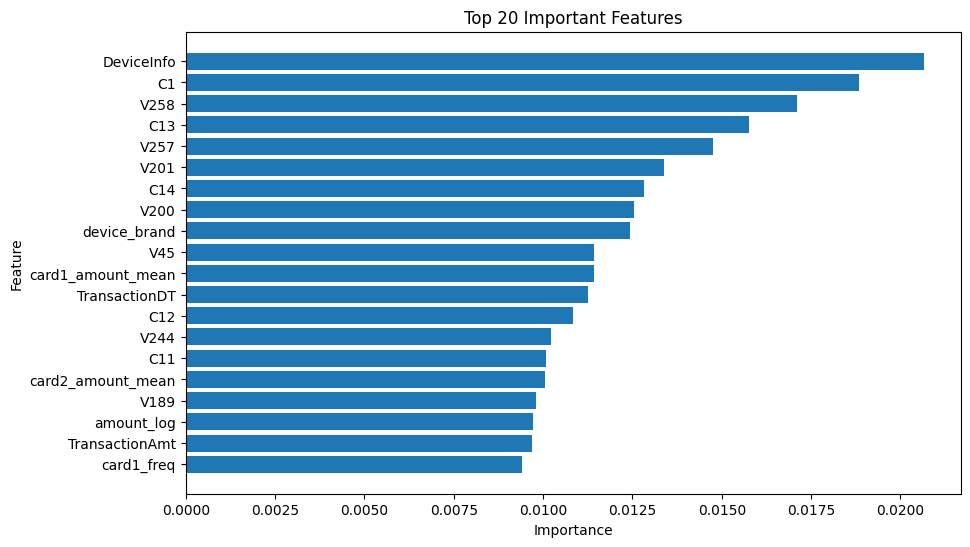

In [ ]:
importances = best_rf.feature_importances_
features = X_train.columns

# Sort features by importance (top 20)
top_indices = np.argsort(importances)[::-1][:20]

# Plot the top 20 features
plt.figure(figsize=(10, 6))
plt.barh(features[top_indices], importances[top_indices])
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Top 20 Important Features")
plt.gca().invert_yaxis()
plt.show()


In [ ]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve, confusion_matrix

ROC AUC CURVE

In [ ]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

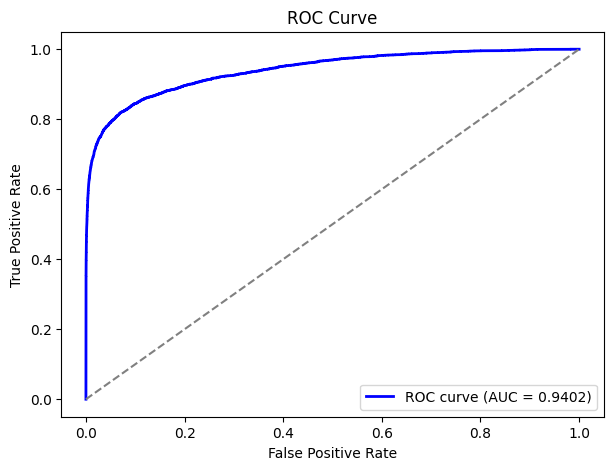

In [ ]:

plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, color="blue", lw=2, label=f"ROC curve (AUC = {roc_auc:.4f})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

PRECISION RECALL CURVE

In [ ]:
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)

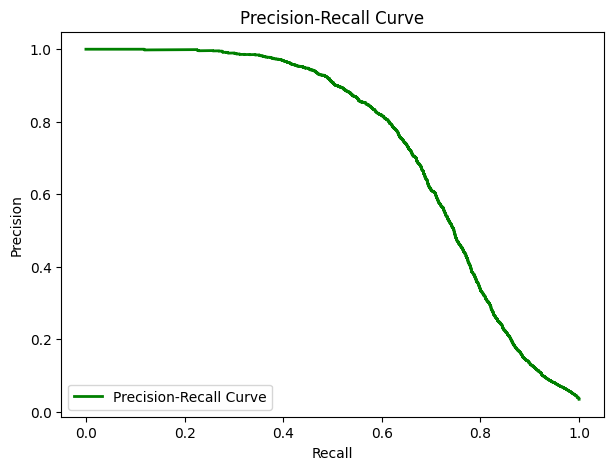

In [ ]:

plt.figure(figsize=(7,5))
plt.plot(recall, precision, color="green", lw=2, label="Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend(loc="lower left")
plt.show()

CONFUSION MATRIX

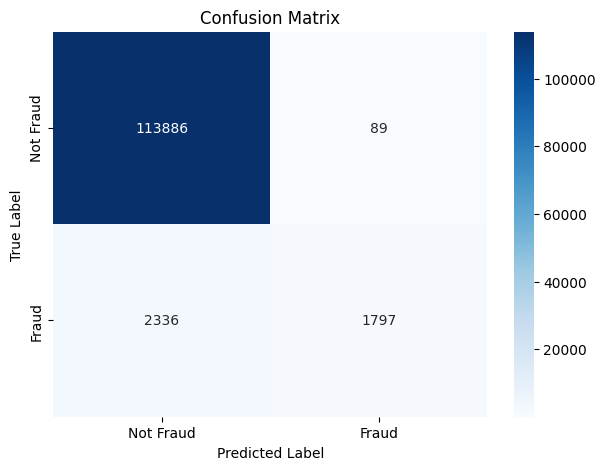

In [ ]:
cm_rf = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(7, 5))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Fraud", "Fraud"], yticklabels=["Not Fraud", "Fraud"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


Model 02

In [ ]:
param_dist_rf2 = {
    "n_estimators": [10, 50],
    "max_depth": [10],
    "min_samples_split": [10],
    "min_samples_leaf": [4],
    "max_features": ["sqrt"]
}


In [ ]:
rf_classifier2 = RandomForestClassifier(random_state=42, n_jobs=-1)


In [ ]:

random_search2 = RandomizedSearchCV(
    rf_classifier2,
    param_distributions=param_dist_rf2,
    n_iter=2,
    cv=2,
    scoring="roc_auc",
    random_state=42,
    n_jobs=-1,
    verbose=1,
    refit=True
)

In [ ]:
random_search2.fit(X_train, y_train)

Fitting 2 folds for each of 2 candidates, totalling 4 fits


RandomizedSearchCV(cv=2,
                   estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
                   n_iter=2, n_jobs=-1,
                   param_distributions={'max_depth': [10],
                                        'max_features': ['sqrt'],
                                        'min_samples_leaf': [4],
                                        'min_samples_split': [10],
                                        'n_estimators': [10, 50]},
                   random_state=42, scoring='roc_auc', verbose=1)

In [ ]:
best_params2 = random_search2.best_params_
print("The best Hyperparameters for Model 2:", best_params2)

The best Hyperparameters for Model 2: {'n_estimators': 50, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 10}


In [ ]:
best_rf2 = RandomForestClassifier(**best_params2, random_state=42, n_jobs=-1)
best_rf2.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=4, min_samples_split=10,
                       n_estimators=50, n_jobs=-1, random_state=42)

In [ ]:
y_pred2 = best_rf2.predict(X_test)
y_pred_proba2 = best_rf2.predict_proba(X_test)[:, 1]

In [ ]:
accuracy2 = accuracy_score(y_test, y_pred2)
roc_auc2 = roc_auc_score(y_test, y_pred_proba2)
classification_rep2 = classification_report(y_test, y_pred2)


In [ ]:
print("Test Accuracy for Model 2:", accuracy2)
print("Test ROC-AUC Score for Model 2:", roc_auc2)
print("Classification Report for Model 2:\n", classification_rep2)

Test Accuracy for Model 2: 0.9739983743692214
Test ROC-AUC Score for Model 2: 0.8698533022452033
Classification Report for Model 2:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99    113975
           1       0.94      0.27      0.42      4133

    accuracy                           0.97    118108
   macro avg       0.96      0.64      0.71    118108
weighted avg       0.97      0.97      0.97    118108



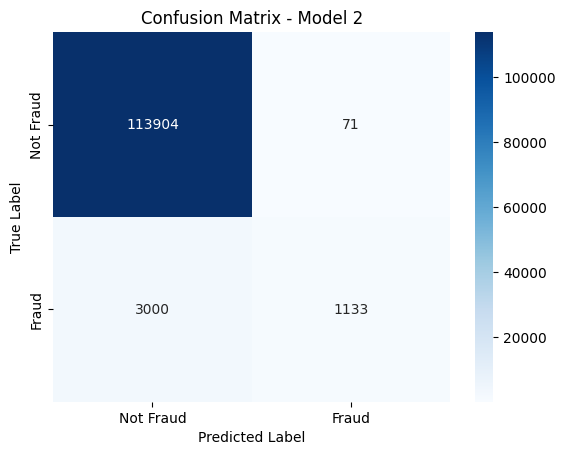

In [ ]:
cm_rf2 = sns.heatmap(confusion_matrix(y_test, y_pred2), annot=True, fmt="d", cmap="Blues", xticklabels=["Not Fraud", "Fraud"], yticklabels=["Not Fraud", "Fraud"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Model 2")
plt.show()


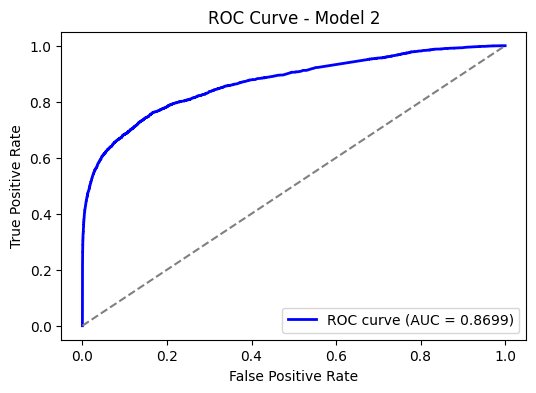

In [ ]:
fpr2, tpr2, _ = roc_curve(y_test, y_pred_proba2)
roc_auc2 = auc(fpr2, tpr2)

plt.figure(figsize=(6, 4))
plt.plot(fpr2, tpr2, color="blue", lw=2, label=f"ROC curve (AUC = {roc_auc2:.4f})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Model 2")
plt.legend(loc="lower right")
plt.show()

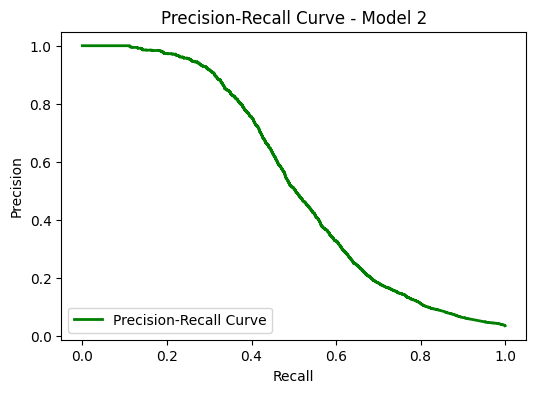

In [ ]:
precision2, recall2, _ = precision_recall_curve(y_test, y_pred_proba2)

plt.figure(figsize=(6,4))
plt.plot(recall2, precision2, color="green", lw=2, label="Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve - Model 2")
plt.legend(loc="lower left")
plt.show()


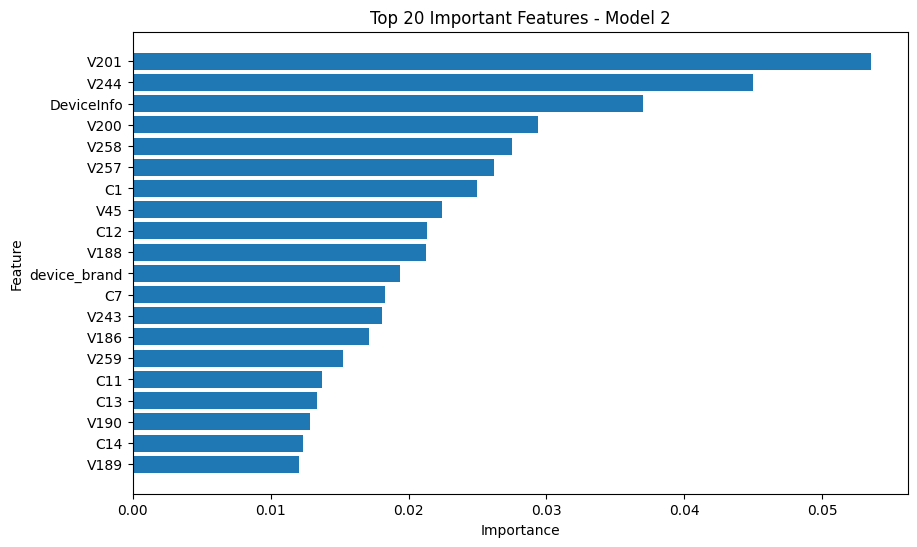

In [ ]:
importances2 = best_rf2.feature_importances_
features2 = X_train.columns
top_indices2 = np.argsort(importances2)[::-1][:20]

plt.figure(figsize=(10, 6))
plt.barh(features2[top_indices2], importances2[top_indices2])
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Top 20 Important Features - Model 2")
plt.gca().invert_yaxis()
plt.show()

Model 03

In [ ]:
param_dist_rf3 = {
    "n_estimators": [10, 50],
    "max_depth": [10],
    "min_samples_split": [10],
    "min_samples_leaf": [4],
    "max_features": ["sqrt"],
    "criterion": ["gini"]
}


In [ ]:
rf_classifier3 = RandomForestClassifier(random_state=42, n_jobs=-1)

In [ ]:
random_search3 = RandomizedSearchCV(
    rf_classifier3,
    param_distributions=param_dist_rf3,
    n_iter=1,
    cv=2,
    scoring="roc_auc",
    random_state=42,
    n_jobs=-1,
    verbose=1,
    refit=True
)


In [ ]:
random_search3.fit(X_train, y_train)

Fitting 2 folds for each of 1 candidates, totalling 2 fits


RandomizedSearchCV(cv=2,
                   estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
                   n_iter=1, n_jobs=-1,
                   param_distributions={'criterion': ['gini'],
                                        'max_depth': [10],
                                        'max_features': ['sqrt'],
                                        'min_samples_leaf': [4],
                                        'min_samples_split': [10],
                                        'n_estimators': [10, 50]},
                   random_state=42, scoring='roc_auc', verbose=1)

In [ ]:
best_params3 = random_search3.best_params_
print("The best Hyperparameters for Model 3:", best_params3)

The best Hyperparameters for Model 3: {'n_estimators': 50, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 10, 'criterion': 'gini'}


In [ ]:
best_rf3 = RandomForestClassifier(**best_params3, random_state=42, n_jobs=-1)
best_rf3.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=4, min_samples_split=10,
                       n_estimators=50, n_jobs=-1, random_state=42)

In [ ]:
y_pred3 = best_rf3.predict(X_test)
y_pred_proba3 = best_rf3.predict_proba(X_test)[:, 1]

In [ ]:
accuracy3 = accuracy_score(y_test, y_pred3)
roc_auc3 = roc_auc_score(y_test, y_pred_proba3)
classification_rep3 = classification_report(y_test, y_pred3)

In [ ]:

print("Test Accuracy for Model 3:", accuracy3)
print("Test ROC-AUC Score for Model 3:", roc_auc3)
print("Classification Report for Model 3:\n", classification_rep3)

Test Accuracy for Model 3: 0.9739983743692214
Test ROC-AUC Score for Model 3: 0.8698533022452033
Classification Report for Model 3:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99    113975
           1       0.94      0.27      0.42      4133

    accuracy                           0.97    118108
   macro avg       0.96      0.64      0.71    118108
weighted avg       0.97      0.97      0.97    118108



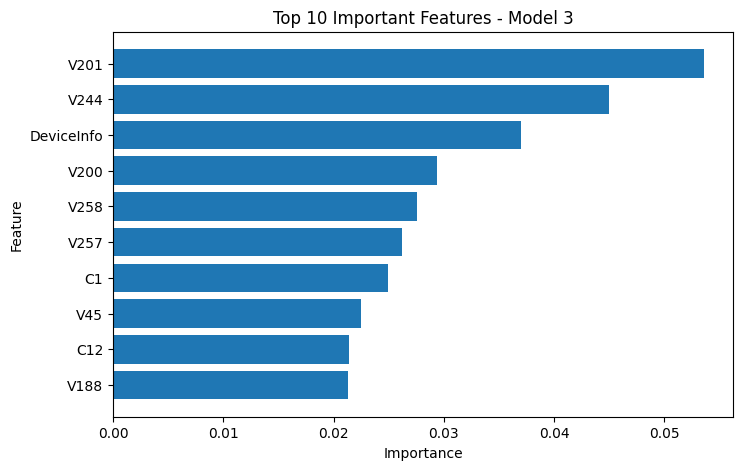

In [ ]:
importances3 = best_rf3.feature_importances_
features3 = X_train.columns
top_indices3 = np.argsort(importances3)[::-1][:10]

plt.figure(figsize=(8, 5))
plt.barh(features3[top_indices3], importances3[top_indices3])
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Top 10 Important Features - Model 3")
plt.gca().invert_yaxis()
plt.show()

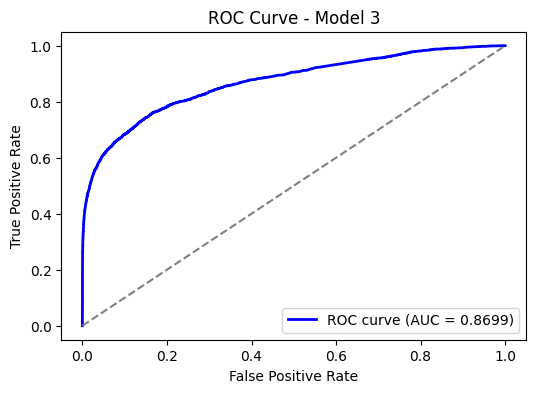

In [ ]:
fpr3, tpr3, _ = roc_curve(y_test, y_pred_proba3)
roc_auc3 = auc(fpr3, tpr3)

plt.figure(figsize=(6, 4))
plt.plot(fpr3, tpr3, color="blue", lw=2, label=f"ROC curve (AUC = {roc_auc3:.4f})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Model 3")
plt.legend(loc="lower right")
plt.show()


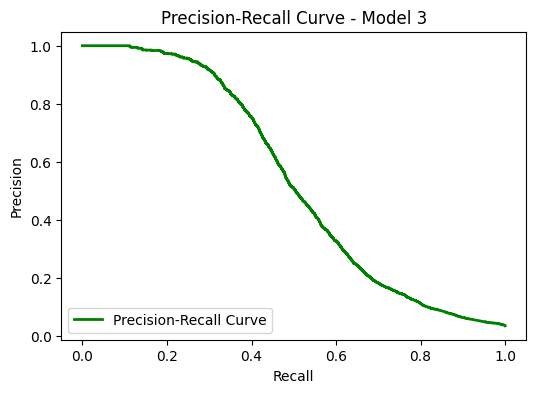

In [ ]:
precision3, recall3, _ = precision_recall_curve(y_test, y_pred_proba3)

plt.figure(figsize=(6,4))
plt.plot(recall3, precision3, color="green", lw=2, label="Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve - Model 3")
plt.legend(loc="lower left")
plt.show()


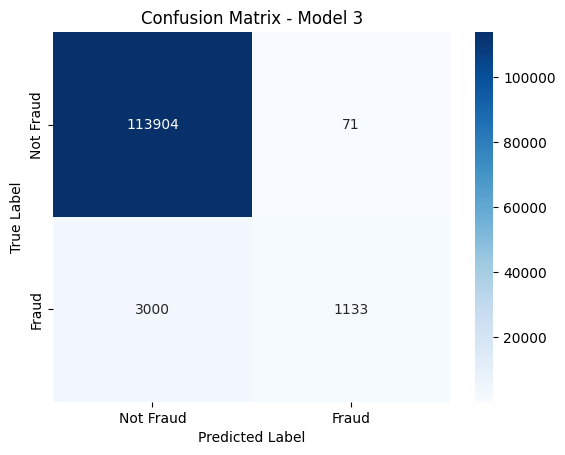

In [ ]:
cm_rf3 = sns.heatmap(confusion_matrix(y_test, y_pred3), annot=True, fmt="d", cmap="Blues", xticklabels=["Not Fraud", "Fraud"], yticklabels=["Not Fraud", "Fraud"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Model 3")
plt.show()

Model 04

In [ ]:
param_dist_rf4 = {
    "n_estimators": [20, 60],  # Slightly more trees
    "max_depth": [15],  # Slightly deeper trees
    "min_samples_split": [8],  # Adjusted split threshold
    "min_samples_leaf": [3],  # Slightly smaller leaf size
    "max_features": ["log2"],  # Different feature selection method
    "criterion": ["entropy"]  # Different split criterion
}

In [ ]:
rf_classifier4 = RandomForestClassifier(random_state=42, n_jobs=-1)

In [ ]:
random_search4 = RandomizedSearchCV(
    rf_classifier4,
    param_distributions=param_dist_rf4,
    n_iter=1,
    cv=2,
    scoring="roc_auc",
    random_state=42,
    n_jobs=-1,
    verbose=1,
    refit=True
)


In [ ]:
random_search4.fit(X_train, y_train)

Fitting 2 folds for each of 1 candidates, totalling 2 fits


RandomizedSearchCV(cv=2,
                   estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
                   n_iter=1, n_jobs=-1,
                   param_distributions={'criterion': ['entropy'],
                                        'max_depth': [15],
                                        'max_features': ['log2'],
                                        'min_samples_leaf': [3],
                                        'min_samples_split': [8],
                                        'n_estimators': [20, 60]},
                   random_state=42, scoring='roc_auc', verbose=1)

In [ ]:
best_params4 = random_search4.best_params_
print("The best Hyperparameters for Model 4:", best_params4)

The best Hyperparameters for Model 4: {'n_estimators': 60, 'min_samples_split': 8, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_depth': 15, 'criterion': 'entropy'}


In [ ]:
best_rf4 = RandomForestClassifier(**best_params4, random_state=42, n_jobs=-1)
best_rf4.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=15, max_features='log2',
                       min_samples_leaf=3, min_samples_split=8, n_estimators=60,
                       n_jobs=-1, random_state=42)

In [ ]:
y_pred4 = best_rf4.predict(X_test)
y_pred_proba4 = best_rf4.predict_proba(X_test)[:, 1]

In [ ]:
accuracy4 = accuracy_score(y_test, y_pred4)
roc_auc4 = roc_auc_score(y_test, y_pred_proba4)
classification_rep4 = classification_report(y_test, y_pred4)

In [ ]:

print("Test Accuracy for Model 4:", accuracy4)
print("Test ROC-AUC Score for Model 4:", roc_auc4)
print("Classification Report for Model 4:\n", classification_rep4)

Test Accuracy for Model 4: 0.9748450570664138
Test ROC-AUC Score for Model 4: 0.9053395460767174
Classification Report for Model 4:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99    113975
           1       0.94      0.30      0.46      4133

    accuracy                           0.97    118108
   macro avg       0.96      0.65      0.72    118108
weighted avg       0.97      0.97      0.97    118108



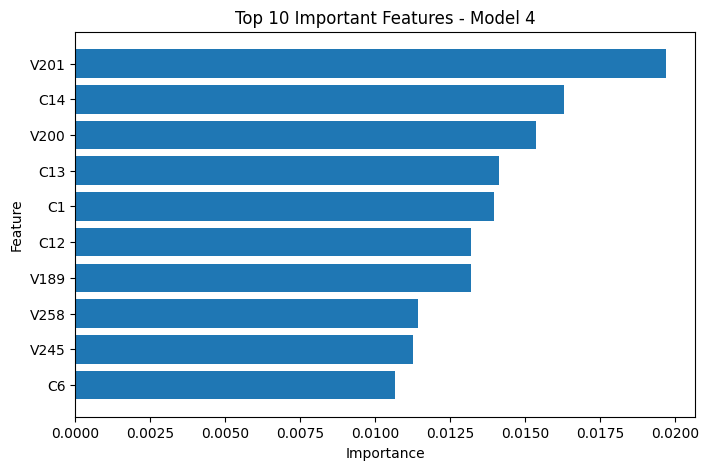

In [ ]:
importances4 = best_rf4.feature_importances_
features4 = X_train.columns
top_indices4 = np.argsort(importances4)[::-1][:10]

plt.figure(figsize=(8, 5))
plt.barh(features4[top_indices4], importances4[top_indices4])
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Top 10 Important Features - Model 4")
plt.gca().invert_yaxis()
plt.show()

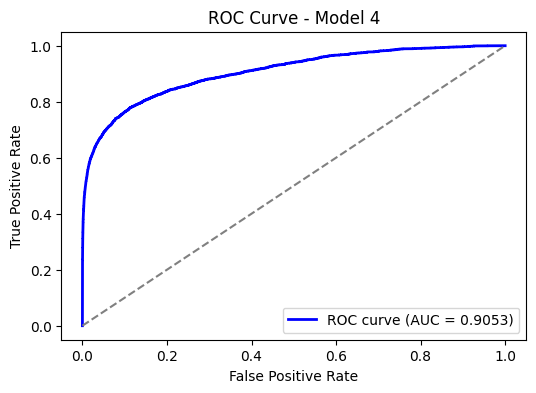

In [ ]:
fpr4, tpr4, _ = roc_curve(y_test, y_pred_proba4)
roc_auc4 = auc(fpr4, tpr4)

plt.figure(figsize=(6, 4))
plt.plot(fpr4, tpr4, color="blue", lw=2, label=f"ROC curve (AUC = {roc_auc4:.4f})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Model 4")
plt.legend(loc="lower right")
plt.show()


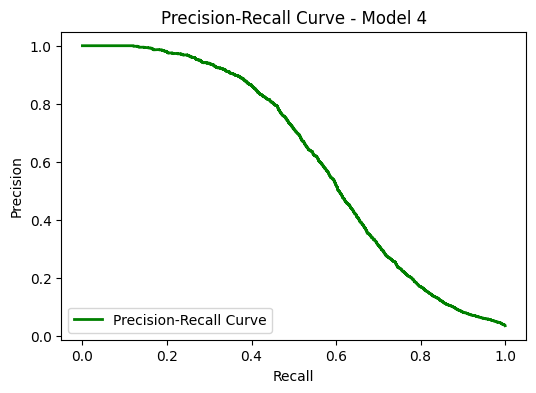

In [ ]:
precision4, recall4, _ = precision_recall_curve(y_test, y_pred_proba4)

plt.figure(figsize=(6,4))
plt.plot(recall4, precision4, color="green", lw=2, label="Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve - Model 4")
plt.legend(loc="lower left")
plt.show()


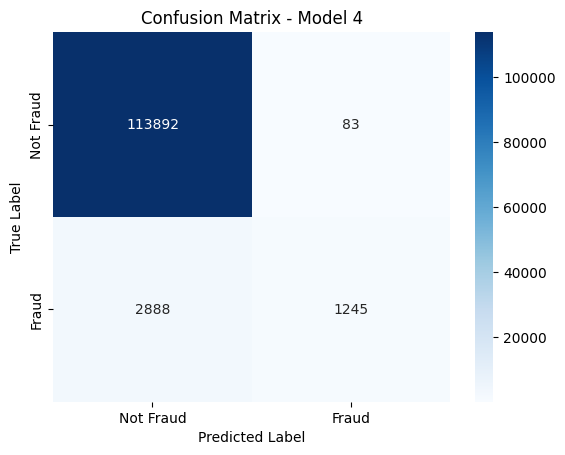

In [ ]:
cm_rf4 = sns.heatmap(confusion_matrix(y_test, y_pred4), annot=True, fmt="d", cmap="Blues", xticklabels=["Not Fraud", "Fraud"], yticklabels=["Not Fraud", "Fraud"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Model 4")
plt.show()
